# Put things to test

In [2]:
!wget -O /tmp/chr1.GRCh38.excerpt.fasta http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta


--2025-03-27 12:12:33--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.60, 18.155.188.175, 18.155.188.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 810105 (791K) [application/octet-stream]
Saving to: ‘/tmp/chr1.GRCh38.excerpt.fasta’

/tmp/chr1.GRCh38.ex 100%[===================>] 791.12K  --.-KB/s    in 0.1s    

2025-03-27 12:12:33 (5.50 MB/s) - ‘/tmp/chr1.GRCh38.excerpt.fasta’ saved [810105/810105]



In [1]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta


--2025-03-27 12:21:27--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.60, 18.155.188.175, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 810105 (791K) [application/octet-stream]
Saving to: ‘chr1.GRCh38.excerpt.fasta’

chr1.GRCh38.excerpt 100%[===================>] 791.12K  5.15MB/s    in 0.2s    

2025-03-27 12:21:27 (5.15 MB/s) - ‘chr1.GRCh38.excerpt.fasta’ saved [810105/810105]



In [3]:
def optimized_load_fasta(filename):
    """
    Load a FASTA file containing a single sequence and return the sequence name and DNA string.
    
    This version avoids inefficient string concatenation by collecting lines in a list
    and joining them once at the end.
    
    Args:
        filename (str): The path to the FASTA file.
        
    Returns:
        tuple: A tuple (name, dna) where 'name' is the header (without '>') and 'dna' is the concatenated DNA sequence.
    """
    with open(filename) as f:
        name = None
        dna_lines = []
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                name = line[1:].strip()
            else:
                dna_lines.append(line)
    return name, ''.join(dna_lines)


In [4]:
file = '/tmp/chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = optimized_load_fasta(file)

In [5]:
chromosome_name

'CM000663.2_excerpt EXCERPT FROM CM000663.2 Homo sapiens chromosome 1, GRCh38 reference primary assembly'

In [6]:
chromosome_dna

'TTGAATGCTGAAATCAGCAGGTAATATATGATAATAGAGAAAGCTATCCCGAAGGTGCATAGGTCAACAATACTTGAGCCTAACTCAGTAGATCCTAAAAGAAAGCAATTTTTGCTGCTAACCTAACATTTCACAATGTCTGGAGACATTTACAGTTCCCACAACCTATGGCAGTTACTGGCATCTACTAGAGGTCAGAGATGCTGGTAAATACTCTGTAATGAACAAGAAGCCCCCCATAGCAAATAAATACCCAGCCCAAGATGGCAATAGTGCCCAGATTGAGAAACTTCACCTTAACCTGATATCATGCAAATATATCTGAAGAAAGACACAAACATAACTAAAGAAAGATGATTACCAGAAGAGATATTCATAAATCTTAGAAGCATAGAAAAAGAAACACAAGGCAATGTTTTCAGTGTCCAGGCAATTATCTTCCTGGGAAAAGCTAGCCTACCAGACCAACATGACTTTTGCACCTTGCTGGCAACCATTCTACTCTTCTGAAGAAGGAGACATCATTTGGACTCTAAAATCCCTTTTTCTGATTTCATACTCATCAAGAAATCTATCCATTTGGCTTAGTTTGTAGCTTATGCTGAAAAACGTGACTTGAGATTTCCTTCACTTGGAAATTGAGATTGCTTAATGTAGATTGACATTCTCAACATTTGGACAATAGTGGGATCAATTATCTTAACTTGCAAAGCTGAAGATTATACCTCTGGGCAACAGTCAAATTACCAAGGTAAATGCTTAGTTGTAGTCAGCATGGGATGGTGTTGAACCACTAATTCCATTTTTTAAAGAGATATAGGGCTTTTCAGGTTCTCTTTTTCTTCTTGAGTGAGCTTAAGTAGTTTGTTTCTTTCAAGGAATTAAACTATTTCATATAAGGTGTCACATTTATTGGCATAAGCTTGTTCAAAATATTTCTTATTATCCTAATATCTGTAGATTTTGTAATGATATCACCTCTCACATTCCTATTTTAAT

## Plot for A, T, G \& C content

Chromosome: CM000663.2_excerpt EXCERPT FROM CM000663.2 Homo sapiens chromosome 1, GRCh38 reference primary assembly
Base Counts:
  A: 254581
  T: 259344
  G: 144991
  C: 141084
%GC Content: 35.76%


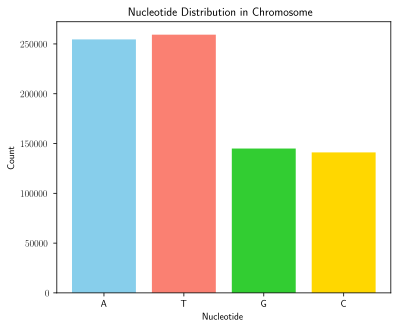

In [7]:
# Load the FASTA file
file = '/tmp/chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = optimized_load_fasta(file)

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib
matplotlib.pyplot.rc('text', usetex=True)
from collections import Counter

# Count nucleotides in the DNA sequence
counts = Counter(chromosome_dna)

# Filter for standard nucleotides
bases = ['A', 'T', 'G', 'C']
base_counts = {base: counts.get(base, 0) for base in bases}
total_bases = sum(base_counts.values())

# Calculate %GC content
gc_content_percent = 100.0 * (base_counts['G'] + base_counts['C']) / total_bases

# Display results
print(f"Chromosome: {chromosome_name}")
print("Base Counts:")
for base in bases:
    print(f"  {base}: {base_counts[base]}")
print(f"%GC Content: {gc_content_percent:.2f}%")

# Plot a bar chart of nucleotide counts
plt.figure(figsize=(6, 5))
plt.bar(base_counts.keys(), base_counts.values(), color=['skyblue', 'salmon', 'limegreen', 'gold'])
plt.xlabel("Nucleotide")
plt.ylabel("Count")
plt.title("Nucleotide Distribution in Chromosome")
plt.show()


## The code below computes the GC content over sliding windows, and plots the results: 

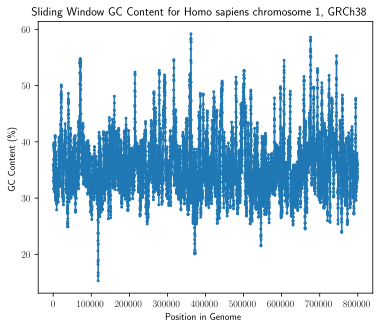

In [8]:
import matplotlib.pyplot as plt

# Load the FASTA file (assumes optimized_load_fasta is defined/imported)
file = '/tmp/chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = optimized_load_fasta(file)

# Parameters for the sliding window
window_size = 1000  # adjust window size as needed
step_size = 100     # adjust step size as needed

# Compute sliding window GC content
gc_values = []
positions = []
for i in range(0, len(chromosome_dna) - window_size + 1, step_size):
    window = chromosome_dna[i:i + window_size]
    # Count G and C bases in the window
    gc_count = window.count('G') + window.count('C')
    gc_percent = 100.0 * gc_count / window_size
    gc_values.append(gc_percent)
    # Use the midpoint of the window for plotting
    positions.append(i + window_size // 2)

# Plot the sliding window GC content
plt.figure(figsize=(6, 5))
plt.plot(positions, gc_values, 'o-',markersize=2)
plt.xlabel("Position in Genome")
plt.ylabel("GC Content (\%)")
plt.title(f"Sliding Window GC Content for Homo sapiens chromosome 1, GRCh38")
plt.grid(False)
plt.show()


## Below is an example implementation for performing a nucleotide skew analysis—specifically, a cumulative GC skew plot. The cumulative GC skew is computed as the running sum of +1 for every G and -1 for every C encountered in the sequence. This type of plot can help identify replication origins and other genomic features.

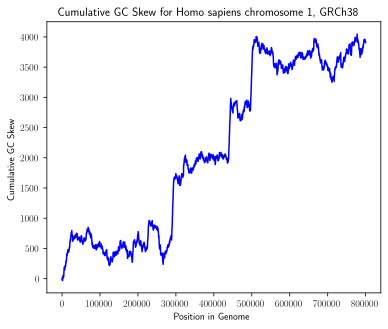

In [9]:
import matplotlib.pyplot as plt

def cumulative_gc_skew(sequence):
    """
    Compute the cumulative GC skew for a DNA sequence.

    Cumulative GC skew is defined as the running sum of +1 for each 'G' and -1 for each 'C'.
    Other nucleotides (A, T, etc.) are ignored.

    Args:
        sequence (str): The DNA sequence.

    Returns:
        list: A list of cumulative skew values starting from position 0.
    """
    skew = [0]
    for base in sequence:
        if base.upper() == 'G':
            skew.append(skew[-1] + 1)
        elif base.upper() == 'C':
            skew.append(skew[-1] - 1)
        else:
            skew.append(skew[-1])
    return skew

# Assuming the FASTA file has been loaded:
file = '/tmp/chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = optimized_load_fasta(file)

# Compute the cumulative GC skew
cumulative_skew = cumulative_gc_skew(chromosome_dna)

# Plot the cumulative GC skew
plt.figure(figsize=(6, 5))
plt.plot(cumulative_skew, color='blue', lw=1.5)
plt.xlabel("Position in Genome")
plt.ylabel("Cumulative GC Skew")
plt.title(f"Cumulative GC Skew for Homo sapiens chromosome 1, GRCh38")
plt.grid(False)
plt.show()


## Below is a Cumulative Base Composition plot


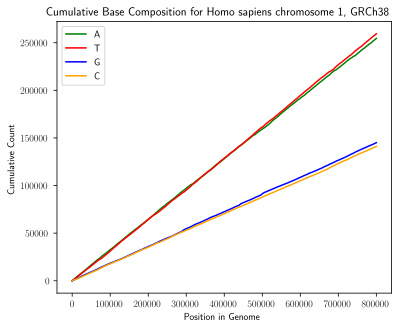

In [10]:
import matplotlib.pyplot as plt

def cumulative_base_composition(sequence):
    """
    Compute cumulative base composition for a DNA sequence.

    For each nucleotide (A, T, G, C), this function computes a running total 
    across the sequence.

    Args:
        sequence (str): The DNA sequence.

    Returns:
        tuple: Four lists containing the cumulative counts of A, T, G, and C.
    """
    n = len(sequence)
    cum_A = [0] * (n + 1)
    cum_T = [0] * (n + 1)
    cum_G = [0] * (n + 1)
    cum_C = [0] * (n + 1)

    for i, base in enumerate(sequence, start=1):
        # Carry over the previous counts
        cum_A[i] = cum_A[i - 1]
        cum_T[i] = cum_T[i - 1]
        cum_G[i] = cum_G[i - 1]
        cum_C[i] = cum_C[i - 1]

        # Increment the appropriate nucleotide count
        base = base.upper()
        if base == 'A':
            cum_A[i] += 1
        elif base == 'T':
            cum_T[i] += 1
        elif base == 'G':
            cum_G[i] += 1
        elif base == 'C':
            cum_C[i] += 1

    return cum_A, cum_T, cum_G, cum_C

# Load the FASTA file (assumes optimized_load_fasta is defined/imported)
file = '/tmp/chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = optimized_load_fasta(file)

# Compute cumulative base composition
cum_A, cum_T, cum_G, cum_C = cumulative_base_composition(chromosome_dna)
positions = range(len(chromosome_dna) + 1)

# Plot the cumulative base composition
plt.figure(figsize=(6, 5))
plt.plot(positions, cum_A, label='A', color='green')
plt.plot(positions, cum_T, label='T', color='red')
plt.plot(positions, cum_G, label='G', color='blue')
plt.plot(positions, cum_C, label='C', color='orange')
plt.xlabel("Position in Genome")
plt.ylabel("Cumulative Count")
plt.title(f"Cumulative Base Composition for Homo sapiens chromosome 1, GRCh38")
plt.legend()
plt.grid(False)
plt.show()


## Below is a code for sliding window Shannon entropy (a measure of sequence complexity) plot

### Explanation

- **Sliding Window Entropy Function:**
  - The function `sliding_window_entropy` iterates over the DNA sequence using a sliding window defined by a `window_size` and a `step_size`.
  - For each window, it counts the occurrences of the nucleotides A, T, G, and C.
  - It then computes the Shannon entropy for the window using the formula:
    $$
    H = -\sum_{i \in \{A, T, G, C\}} p(i) \log_2 p(i)
    $$
    where \(p(i)\) is the frequency of nucleotide \(i\) in the current window.
  - The function returns two lists:
    - **positions**: The midpoint positions of each window, which will be used as the x-axis in the plot.
    - **entropies**: The computed Shannon entropy values for each window, representing the sequence complexity.

- **Plotting the Entropy:**
  - The x-axis of the plot shows the position in the genome (using the midpoint of each window).
  - The y-axis shows the Shannon entropy (in bits), which reflects the sequence complexity.
  - This visualization can help identify genomic regions with high or low complexity, potentially correlating with various genomic features.

By adjusting the `window_size` and `step_size`, you can control the resolution of the analysis to better capture variations in sequence complexity across the genome.

The Y-axis represents the Shannon entropy (in bits) for each sliding window of the sequence. Here’s what the values indicate:

**Value of 1**:
An entropy of 1 bit per nucleotide suggests that there is some level of bias in the nucleotide distribution—meaning one or more bases occur more frequently than others. This indicates lower randomness or complexity in that window.

**Value of 2**:
An entropy of 2 bits per nucleotide is the maximum for a four-letter alphabet (A, T, G, C) when all nucleotides are equally represented. This indicates that the sequence is highly random and complex in that window.

In summary, values closer to 2 suggest a more uniform (and therefore more complex) distribution of nucleotides, while values closer to 1 (or lower) indicate more bias and less complexity.


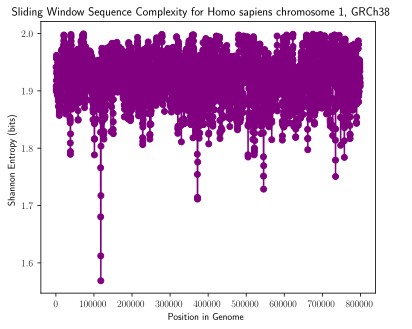

In [13]:
import matplotlib.pyplot as plt
import math

def sliding_window_entropy(sequence, window_size, step_size):
    """
    Calculate the sliding window Shannon entropy for a DNA sequence.

    Shannon entropy is calculated as:
        H = - sum(p[i] * log2(p[i]))
    where p[i] is the frequency of nucleotide i in the window.

    Args:
        sequence (str): The DNA sequence.
        window_size (int): The size of the sliding window.
        step_size (int): The step size for moving the window.
    
    Returns:
        tuple: (positions, entropies)
            positions (list): The midpoint positions of each window.
            entropies (list): The Shannon entropy for each window.
    """
    entropies = []
    positions = []
    for i in range(0, len(sequence) - window_size + 1, step_size):
        window = sequence[i:i + window_size]
        # Count nucleotides A, T, G, C in the window
        counts = {base: window.count(base) for base in "ATGC"}
        total = sum(counts.values())
        entropy = 0
        # Compute Shannon entropy for the window
        for base in "ATGC":
            p = counts[base] / total if total > 0 else 0
            if p > 0:
                entropy -= p * math.log(p, 2)
        entropies.append(entropy)
        # Use the midpoint of the window for the x-axis
        positions.append(i + window_size // 2)
    return positions, entropies

# Load the FASTA file (assumes optimized_load_fasta is defined/imported)
file = '/tmp/chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = optimized_load_fasta(file)

# Set sliding window parameters
window_size = 1000  # Adjust as needed
step_size = 200     # Adjust as needed

# Calculate sliding window entropy
positions, entropy_values = sliding_window_entropy(chromosome_dna, window_size, step_size)

# Plot the sliding window Shannon entropy
plt.figure(figsize=(6, 5))
plt.plot(positions, entropy_values, color='purple', marker='o', linestyle='-')
plt.xlabel("Position in Genome")
plt.ylabel("Shannon Entropy (bits)")
plt.title(f"Sliding Window Sequence Complexity for Homo sapiens chromosome 1, GRCh38")
plt.grid(False)
plt.show()


## Finally we can look at k-mer frequency histogram for a k-mer length of 4

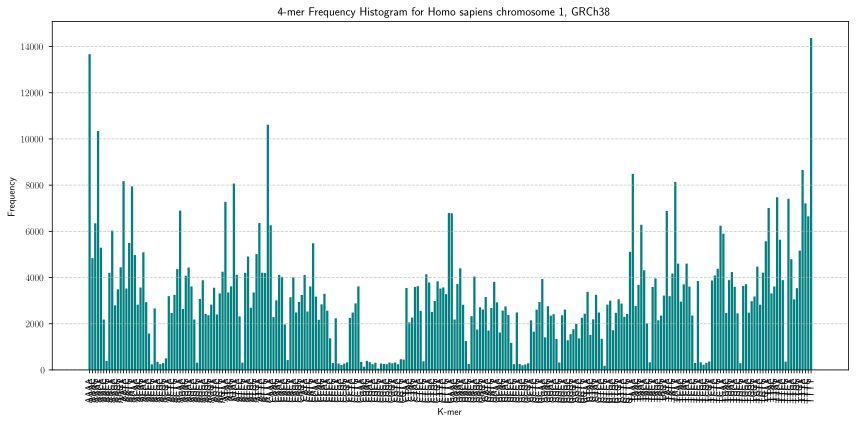

In [14]:
import matplotlib.pyplot as plt

def kmer_frequency(sequence, k):
    """
    Compute the frequency of each k-mer in the given sequence.

    Args:
        sequence (str): The DNA sequence.
        k (int): The length of the k-mer.

    Returns:
        dict: A dictionary mapping each k-mer to its frequency.
    """
    freqs = {}
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k]
        freqs[kmer] = freqs.get(kmer, 0) + 1
    return freqs

# Load the FASTA file (assuming optimized_load_fasta is defined/imported)
file = '/tmp/chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = optimized_load_fasta(file)

# Set the k-mer length (change k as desired)
k = 4

# Compute k-mer frequencies
freqs = kmer_frequency(chromosome_dna, k)

# Sort k-mers for a consistent x-axis ordering
kmers = sorted(freqs.keys())
counts = [freqs[kmer] for kmer in kmers]

# Plot the k-mer frequency histogram
plt.figure(figsize=(12, 6))
plt.bar(range(len(kmers)), counts, tick_label=kmers, color='teal')
plt.xlabel('K-mer')
plt.ylabel('Frequency')
plt.title(f'{k}-mer Frequency Histogram for Homo sapiens chromosome 1, GRCh38')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
